# Activity 1.3 : Regularization

#### **Castillo, Maria Antonette O.**

#### **CPE32S8**

--------

#### Objective(s):

This activity aims to demonstrate how to apply  regularization in neural networks

#### Intended Learning Outcomes (ILOs):
* Demonstrate how to build and train neural networks with regularization
* Demonstrate how to visualize the model with regularization
* Evaluate the result of model with regularization


#### Resources:
* Jupyter Notebook
* MNIST


#### Procedures
Load the necessary libraries

In [1]:
from __future__ import print_function

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Load the data, shuffled and split between train and test sets

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

Get the size of the sample train data

In [3]:
x_train[0].shape

(28, 28)

Check the sample train data

In [4]:
x_train[333]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  87, 138,
        170, 253, 201, 244, 212, 222, 138,  86,  22,   0,   0,   0,   0,
          0,   0],
       [  

Check the corresponding label in the training set

In [5]:

y_train[333]

8

Check the actual image

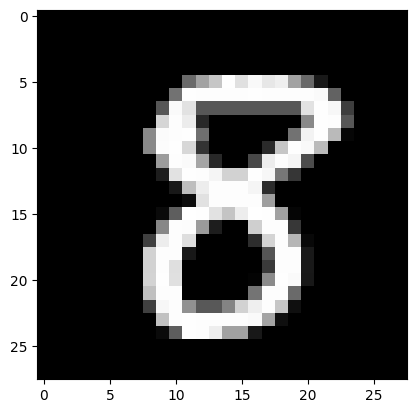

In [6]:

plt.imshow(x_train[333], cmap='Greys_r')

Check the shape of the x_train and x_test

In [7]:

print(x_train.shape, 'train samples')
print(x_test.shape, 'test samples')

(60000, 28, 28) train samples
(10000, 28, 28) test samples


* Convert the x_train and x_test
* Cast the numbers to floats
* Normalize the inputs

In [8]:

x_train = x_train.reshape(len(x_train), 28*28)
x_test = x_test.reshape(len(x_test), 28*28)


x_train = x_train.astype('float32')
x_test = x_test.astype('float32')


x_train /= 255
x_test /= 255


Convert class vectors to binary class matrices

In [9]:

num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

y_train[333]  # now the digit k is represented by a 1 in the kth entry (0-indexed) of the length 10 vector

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)

* Build the model with two hidden layers of size 64.
* Use dropout of 0.2
* Check the model summary

In [10]:

model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(784,))) 
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu')) 
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                50240     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 55050 (215.04 KB)
Trainable params: 55050 (215.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Compile the model using learning rate of 0.001 and optimizer of RMSprop

In [12]:
learning_rate = .001
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=learning_rate),
              metrics=['accuracy'])
batch_size = 128  # mini-batch with 128 examples
epochs = 30
history = model.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(x_test, y_test))

Epoch 1/30



469/469 [==============================] - 3s 4ms/step - loss: 0.5115 - accuracy: 0.8469 - val_loss: 0.2077 - val_accuracy: 0.9389
Epoch 2/30
469/469 [==============================] - 2s 3ms/step - loss: 0.2578 - accuracy: 0.9238 - val_loss: 0.1538 - val_accuracy: 0.9513
Epoch 3/30
469/469 [==============================] - 2s 3ms/step - loss: 0.2034 - accuracy: 0.9395 - val_loss: 0.1270 - val_accuracy: 0.9626
Epoch 4/30
469/469 [==============================] - 1s 3ms/step - loss: 0.1728 - accuracy: 0.9481 - val_loss: 0.1132 - val_accuracy: 0.9657
Epoch 5/30
469/469 [==============================] - 1s 3ms/step - loss: 0.1566 - accuracy: 0.9531 - val_loss: 0.1061 - val_accuracy: 0.9683
Epoch 6/30
469/469 [==============================] - 1s 3ms/step - loss: 0.1451 - accuracy: 0.9563 - val_loss: 0.1023 - val_accuracy: 0.9691
Epoch 7/30
469/469 [==============================] - 2s 4ms/step - loss: 0.1343 - accuracy: 0.9598 - val_loss: 0.1056 - val_accuracy: 0.9692
Epoch 8/30
469/46

Use Keras evaluate function to evaluate performance on the test set

In [13]:

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.10035298019647598
Test accuracy: 0.9772999882698059


Interpret the result

### ***The model with learning rate of 0.001, batch size of 128, and epochs of 30 resulted to approximately 97.73%, which is a high accuracy. It also has a minimal loss of 0.01 which indicates that the predictions are closer to the actual label. This means that the model has the ability to predict the numbers in MNIST dataset. Furthermore, the model consists of two hidden layer with 64 neurons, and relu as their activation function. Meanwhile, the final layer has 10 neurons since there are 10 classes in the dataset. Softmax activation is implemented because it is used for multi-class classification which produces a set of probabilities.***

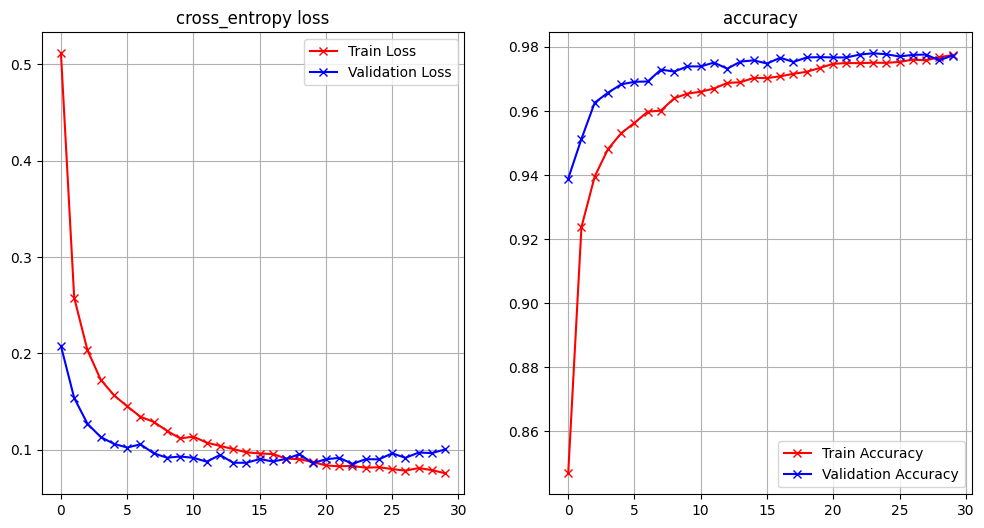

In [14]:
def plot_loss_accuracy(history,title):
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(history.history["loss"],'r-x', label="Train Loss")
    ax.plot(history.history["val_loss"],'b-x', label="Validation Loss")
    ax.legend()
    ax.set_title('cross_entropy loss')
    ax.grid(True)


    ax = fig.add_subplot(1, 2, 2)
    ax.plot(history.history["accuracy"],'r-x', label="Train Accuracy")
    ax.plot(history.history["val_accuracy"],'b-x', label="Validation Accuracy")
    ax.legend()
    ax.set_title('accuracy')
    ax.grid(True)

    plt.suptitle(title)


plot_loss_accuracy(history, '')

Interpret the result

### ***The graph of accuracy and loss for validation and training set indicates that the model is not overfitting. For training set, as the number of epochs increases, the accuracy also continously increases and the loss keeps on decreasing. It means that the model is actually learning from the data and improving its performance. Moreover, beyond 15 epochs, the loss and accuracy for validation set stabilizes in a high accuracy and minimal loss. This means that the model is good at predicting even the unseen data, and no need for adding more epochs.***

#### Supplementary Activity

* Use the Keras "Sequential" functionality to build a new model (model_1) with the following specifications:

1. Two hidden layers.
2. First hidden layer of size 400 and second of size 300
3. Dropout of .4 at each layer
4. How many parameters does your model have?  How does it compare with the previous model?
5. Train this model for 20 epochs with RMSProp at a learning rate of .001 and a batch size of 128
6. Use at least two  regularization techniques and apply it to the new model (model_2)
7. Train this model for your preferred epochs , learning rate, batch size and optimizer
8. Compare the accuracy and loss (training and validation) of model_1 and model_2

In [162]:
import pandas as pd

apple = pd.read_csv(r'C:\Users\maria\Downloads\apple_quality.csv') # Apple Quality Dataset

In [163]:
apple.head()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good


In [164]:
apple.isnull().sum() # Checking if there's any null values

A_id           1
Size           1
Weight         1
Sweetness      1
Crunchiness    1
Juiciness      1
Ripeness       1
Acidity        0
Quality        1
dtype: int64

In [165]:
apple = apple.dropna() # Removing the null values

In [166]:
apple.dtypes # Checking the data types

A_id           float64
Size           float64
Weight         float64
Sweetness      float64
Crunchiness    float64
Juiciness      float64
Ripeness       float64
Acidity         object
Quality         object
dtype: object

In [167]:
apple['Acidity'] = apple['Acidity'].astype(float) # Converting the Acidity feature to float

In [168]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

apple.Quality = label_encoder.fit_transform(apple.Quality) # Label Encoding for the target variable

In [169]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

apple.iloc[:, :-1] = scaler.fit_transform(apple.iloc[:, :-1]) # Scaling the features
apple

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,-1.731618,-1.798424,-0.950373,2.993421,-1.424150,0.690545,-0.089872,-0.269415,1
1,-1.730752,-0.359060,-1.154404,2.127698,0.429746,0.176767,0.197020,-0.378997,1
2,-1.729886,0.109445,-0.225759,-0.652507,-0.946892,1.205422,-0.286156,1.206044,0
3,-1.729020,-0.079977,-0.800146,0.923916,-0.772399,1.619575,-2.087320,0.338315,1
4,-1.728154,0.968573,-0.191640,0.044164,-1.096894,1.305025,-0.961548,0.201472,1
...,...,...,...,...,...,...,...,...,...
3995,1.728154,0.291729,-0.048594,-1.669449,-0.365345,0.614425,0.931482,0.028866,0
3996,1.729020,0.108878,1.834105,0.137124,-1.159058,-0.252634,-0.846326,0.842347,1
3997,1.729886,-1.105655,-0.716904,-1.013784,-0.234036,0.874379,2.275957,-0.668950,0
3998,1.730752,-1.818112,-0.492908,1.459901,-0.845446,0.854549,-0.151419,-1.093171,1


In [170]:
X = apple.iloc[:, :-1] # Independent Varables (all columns except the last one)
y = apple.iloc[:, -1:] # Dependent Variable (last column)

In [171]:
from sklearn.model_selection import train_test_split 

# Splitting the dataset to testing and training set
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=41,
                                                    shuffle=True) 

In [172]:
# Checking the number of samples
print(x_train.shape, 'x_train samples')
print(x_test.shape, 'x_test samples')
print(y_train.shape, 'y_train samples')
print(y_test.shape, 'y_test samples')

(3200, 8) x_train samples
(800, 8) x_test samples
(3200, 1) y_train samples
(800, 1) y_test samples


In [173]:
# Creating the model_1 based on the instructions
model_1 = Sequential()
model_1.add(Dense(400, activation='relu', input_shape=(8,))) # First hidden layer with 400 neurons
model_1.add(Dropout(0.4)) # Dropout of 0.4 in the first hidden layer
model_1.add(Dense(300, activation='relu')) # Second hidden layer with 300 neurons
model_1.add(Dropout(0.4)) # Dropout of 0.4 in the second hidden layer
model_1.add(Dense(1, activation='sigmoid')) # Final layer with sigmoid activation function

In [174]:
model_1.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_52 (Dense)            (None, 400)               3600      
                                                                 
 dropout_37 (Dropout)        (None, 400)               0         
                                                                 
 dense_53 (Dense)            (None, 300)               120300    
                                                                 
 dropout_38 (Dropout)        (None, 300)               0         
                                                                 
 dense_54 (Dense)            (None, 1)                 301       
                                                                 
Total params: 124201 (485.16 KB)
Trainable params: 124201 (485.16 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### ***The summary of the model shows that the first hidden layer has an ouput shape of 400 while the second hidden layer has 300. The final layer has only one neuron since the apple dataset is a binary classification. Moreover, the layers' parameter are computed by adding the weights and biases, which has a formula of "(n x m) + m", wherein n = number of input and m = number of neurons. In this case, the first hidden layer has 8 inputs with 400 number of neurons, upon computing it using the formula, the result is 3,600. Next, the second hidden layer will use the output size of the previous dense layer as its input size: (400 x 300) + 300 = 120,300. Then, the final layer's parameter is computed with the equation of (300 x 1) + 1 = 301. Meanwhile, the dropout layer has no parameter to learn since it is a regularization technique that prevent overfitting by randomly dropping out some units during the training.***

In [175]:
# Compiling the model with binary cross-entropy loss, RMSprop optimizer, and accuracy metric
learning_rate = .001 
model_1.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=learning_rate),
              metrics=['accuracy'])
batch_size = 128  
epochs = 20

# Train the model and store training history
history_model1 = model_1.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(x_test, y_test))

Epoch 1/20
25/25 [==============================] - 1s 12ms/step - loss: 0.4984 - accuracy: 0.7606 - val_loss: 0.4094 - val_accuracy: 0.8138
Epoch 2/20
25/25 [==============================] - 0s 5ms/step - loss: 0.3756 - accuracy: 0.8294 - val_loss: 0.3572 - val_accuracy: 0.8350
Epoch 3/20
25/25 [==============================] - 0s 5ms/step - loss: 0.3456 - accuracy: 0.8462 - val_loss: 0.3239 - val_accuracy: 0.8487
Epoch 4/20
25/25 [==============================] - 0s 5ms/step - loss: 0.3220 - accuracy: 0.8562 - val_loss: 0.3098 - val_accuracy: 0.8575
Epoch 5/20
25/25 [==============================] - 0s 5ms/step - loss: 0.3042 - accuracy: 0.8603 - val_loss: 0.3130 - val_accuracy: 0.8625
Epoch 6/20
25/25 [==============================] - 0s 5ms/step - loss: 0.3079 - accuracy: 0.8634 - val_loss: 0.3009 - val_accuracy: 0.8600
Epoch 7/20
25/25 [==============================] - 0s 5ms/step - loss: 0.3014 - accuracy: 0.8728 - val_loss: 0.2978 - val_accuracy: 0.8637
Epoch 8/20
25/25 [=

In [176]:
# Determining the result for testing set
score = model_1.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.2624252736568451
Test accuracy: 0.8912500143051147


### ***Model 1 has two hidden layers and dropout of .4 at each layer. When the model is trained for 20 epochs with RMSProp at a learning rate of .001 and a batch size of 128, the accuracy resulted to approximately 89% and a loss of 0.26. The model is already somehow predicting the correct label but this result could still improve by adjusting some hyperparameters.***


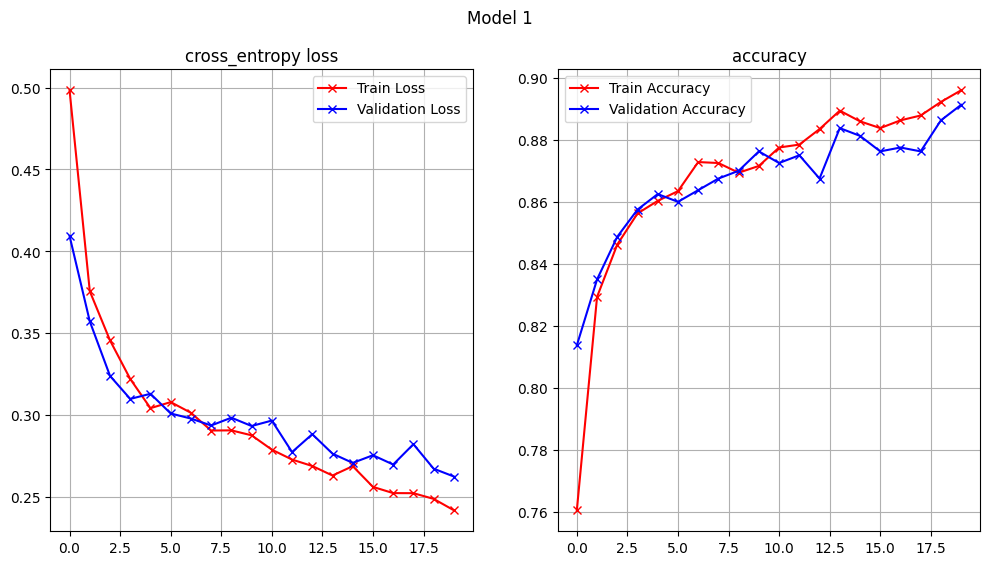

In [177]:
plot_loss_accuracy(history_model1, 'Model 1')

### ***Based on the graph above, as the number of epochs increases, the accuracy also increases, while the loss decreases. However, there's an evident fluctuations in both training and validation sets. This means that even though the model is learning from the data, and it's accuracy in predicting somehow getting higher, it still shows some instability in its performace.***

In [178]:
# Creating Model 2 
model_2 = Sequential()
model_2.add(Dense(64, activation='relu', input_shape=(8,)))  # First hidden layer with 64 neurons
model_2.add(Dropout(0.27))  # Dropout of 0.27 in the first hidden layer
model_2.add(Dense(50, activation='relu', kernel_regularizer='l2')) # Second hidden layer with 64 neurons and with L2 regularization
model_2.add(Dropout(0.27))  # Dropout of 0.27 in the second hidden layer
model_2.add(Dense(45, activation='relu')) # Third hidden layer with 45 neurons
model_2.add(Dropout(0.3))  # Dropout of 0.3 in the third hidden layer
model_2.add(Dense(1, activation='sigmoid')) # Final layer with sigmoid activation function

In [179]:
model_2.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_55 (Dense)            (None, 64)                576       
                                                                 
 dropout_39 (Dropout)        (None, 64)                0         
                                                                 
 dense_56 (Dense)            (None, 50)                3250      
                                                                 
 dropout_40 (Dropout)        (None, 50)                0         
                                                                 
 dense_57 (Dense)            (None, 45)                2295      
                                                                 
 dropout_41 (Dropout)        (None, 45)                0         
                                                                 
 dense_58 (Dense)            (None, 1)               

### ***Model 2 consists of three hidden layers and a final layer with sigmoid activation function. Sigmoid activation function is implemented since Apple dataset is a binary classificaion, and it transforms the output of a neuron into a value between 0 and 1. The parametes of each dense layer is computed by adding the weights and biases, and with the formula of "(n x m) + m", as explained further in model 1 summary. To compare the two model, model 1 has larger number of output shape and parameters. Meanwhile, model 2 has more hidden layers and regularization techniques. Aside from dropout, it also implemented the l2 regularization in the second hidden layer. L2 regularization discourages large weights in the model which prevents it from becoming too dependent on any feature. Meanwhile, dropout works by randomly selecting neurons that will be ignored during training, it also depends on the dropout rate. In this case, first and second hidden layer has 0.27 dropout rate, while the third hidden layer has a little bit higher which is 0.3.***





In [180]:
# Compiling the model with binary cross-entropy loss, RMSprop optimizer, and accuracy metric
learning_rate = .001
model_2.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=learning_rate),
              metrics=['accuracy'])
batch_size = 50
epochs = 180

# Train the model and store training history
history_model2 = model_2.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(x_test, y_test))

Epoch 1/180
64/64 [==============================] - 1s 5ms/step - loss: 1.0607 - accuracy: 0.6187 - val_loss: 0.8543 - val_accuracy: 0.7600
Epoch 2/180
64/64 [==============================] - 0s 3ms/step - loss: 0.7748 - accuracy: 0.7409 - val_loss: 0.6396 - val_accuracy: 0.7850
Epoch 3/180
64/64 [==============================] - 0s 3ms/step - loss: 0.6156 - accuracy: 0.7912 - val_loss: 0.5321 - val_accuracy: 0.8150
Epoch 4/180
64/64 [==============================] - 0s 2ms/step - loss: 0.5397 - accuracy: 0.8031 - val_loss: 0.4784 - val_accuracy: 0.8250
Epoch 5/180
64/64 [==============================] - 0s 2ms/step - loss: 0.4921 - accuracy: 0.8234 - val_loss: 0.4376 - val_accuracy: 0.8388
Epoch 6/180
64/64 [==============================] - 0s 2ms/step - loss: 0.4542 - accuracy: 0.8334 - val_loss: 0.4030 - val_accuracy: 0.8413
Epoch 7/180
64/64 [==============================] - 0s 2ms/step - loss: 0.4341 - accuracy: 0.8406 - val_loss: 0.3886 - val_accuracy: 0.8562
Epoch 8/180
6

In [181]:
score = model_2.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.1721046268939972
Test accuracy: 0.9524999856948853


### ***Looking at the result of the two models, this model 2 has higher accuracy of 95% and a lower loss of 0.17, compared to model 1 that has 89% accuracy and 0.26 loss. This means that this model is performing better at predicting the apple's quality. Additionally, model 2 has lower batch size and higher epochs which contributed to its improved performance.***

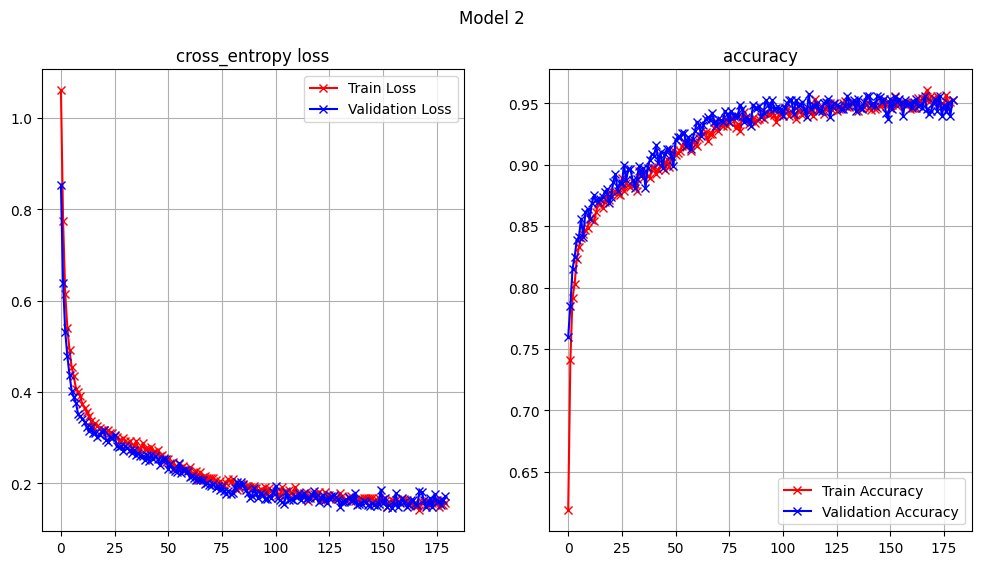

In [182]:
plot_loss_accuracy(history_model2, 'Model 2')

### ***Upon analyzing the graph above, the accuracy and loss of validation and training sets are almost similar as it shows evident overlapping. Both leads to high accuracy and minimal loss. The highest accuracy attained by the model was around 95% while the loss was at around 0.15. This indicates that model 2 is better at predicting the target variable compared to the model 1 earlier. Model 1 has lower accuracy and has fluctuations. Meanwhile, model 2 is more stable and consistent as the number of epochs increases.***

#### Conclusion

### ***In this activity, I was able to create model with regularization techniques. I used dropout and L2 regularization. L2 regularization avoids the model to have large weights, which makes it not too dependent on any features. Meanwhile, dropout randomly select neurons depending on its rate, and that neurons will be ignored during training. Both of these techniques contribute to the performance of the models to avoid overfitting. Furthermore, I was able to compare models with different hyperparameters like learning rate, number of epochs, and batch size. Model 2 shows better performance and result compared to the model 1. This shows that adjusting the network or parameters can improve the ability of the model to predict the target variable.***

Google colab link: https://colab.research.google.com/drive/1bUkl0WnBbA767pEKCtV3O7t-nD9wxXMu?usp=sharing